<a href="https://colab.research.google.com/github/Ramadevipithani/Ramadevi/blob/main/FMML_ClassificationII_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2
# Classification II : Introduction to Decision Trees

```
Module Coordinator : Akshit Garg

Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of some property by inferring simple decision rules from the data features.


Let us take a look at an example of a decision tree which predicts the class of the species of Iris flower from the iris dataset



In [14]:
#Importing the necessary packages

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


### Code for the core experiment:

- Creating the decision tree classifier based on parameters passed.
- Evaluating the classifier's accuracy and plotting its confusion matrix.
- Plotting its decision boundary.
- Creating and showing the visualization of the tree made.

**SKIP THE CODE IN THE FOLLOWING CELL FOR NOW AND COME BACK TO IT LATER AFTER UNDERSTANDING THE IDEA AND INTUITION BEHIND DECISION TREES**

In [15]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
  #Importing the Decision tree classifier from sklearn:

  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

  print("Here is a diagram of the tree created to evaluate each sample:")
  fig, ax = plt.subplots(figsize=(12,10))
  imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, class_names = class_names, impurity=False, proportion=True, rounded=True, fontsize = 12)
  plt.show()


def giveAnExample(n : int):
  performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.title("Decision Boundary for two features used in Decision Tree")
  # plt.legend()
  plt.show()

## Loading IRIS Dataset:

### About the IRIS dataset:

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). We shall be using decision trees to try to predict the correct species of the flower using these four features

In [16]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
irisData = pandas.DataFrame(\
    data = np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])), \
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)

#Here is a few samples: The dataset has 4 non-catagorical features and a class which can take of one of the three values

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


## Example of DT on Iris dataset with performace evaluation, and tree structure

Accuracy of the decision tree on the test set: 

0.895


Here is a diagram of the tree created to evaluate each sample:


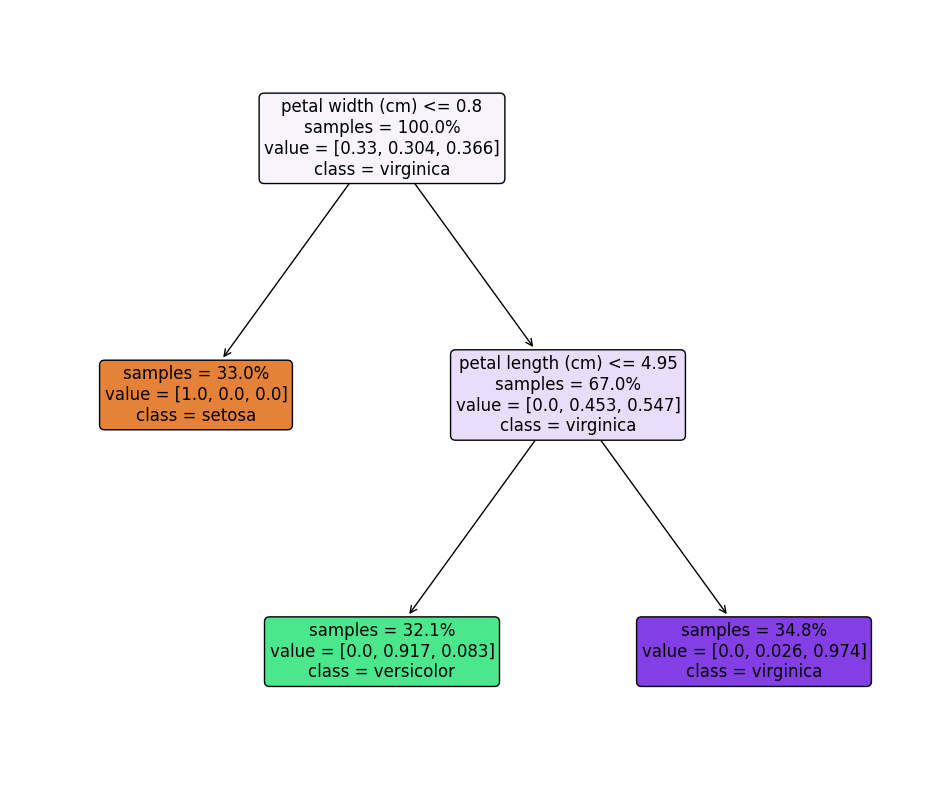

In [17]:
giveAnExample(2)

### Exercise 1:
 Kindly use the above tree to evaluate the classes for the following examples and verify what percent of them are classified correctly by the tree:

In [18]:
irisData.sample(n = 5, random_state=0)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa


Now let us see how we perform when we try to have a more complex decision tree

Accuracy of the decision tree on the test set: 

0.974


Here is a diagram of the tree created to evaluate each sample:


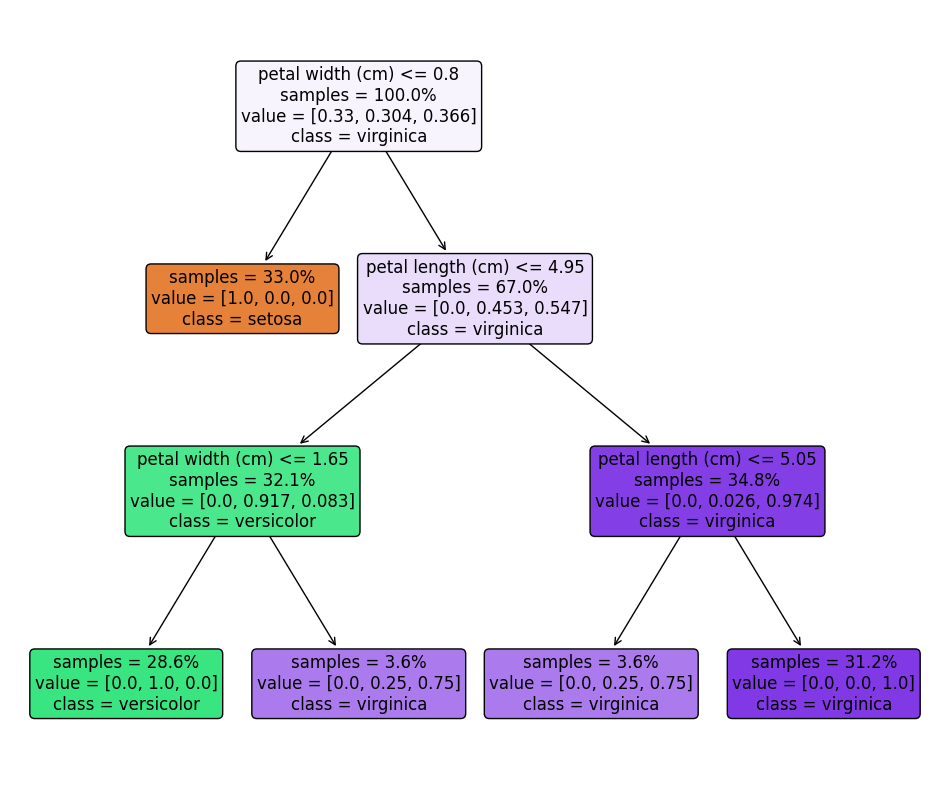

In [19]:
giveAnExample(3)

### Exercise 2:
Repeat Exercise 1 for the above tree as well.


---

We observe that even though that the tree had four features available to it, the tree uses only two of them to classify the cases of species. It gives us an idea that those two features chosen are performing quite decently. Let us examine the decision boundary generated by the tree when only those two features namely **petal length and petal width** are used

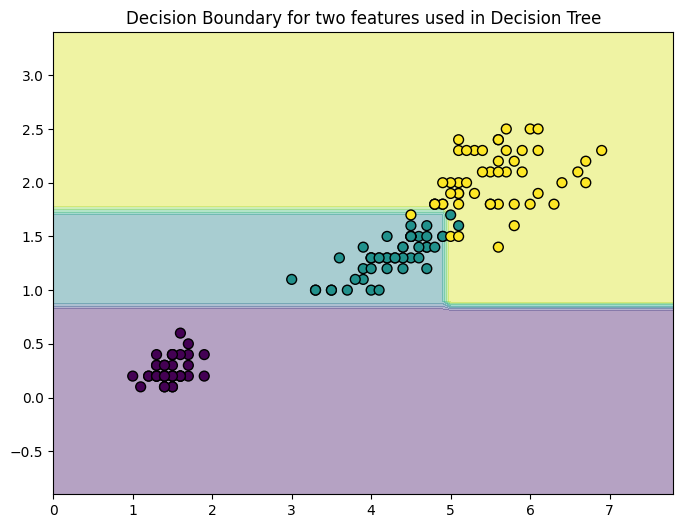

In [20]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [2, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [2, 3], clf)

**Decision boundary** with considering **sepal width and length**:

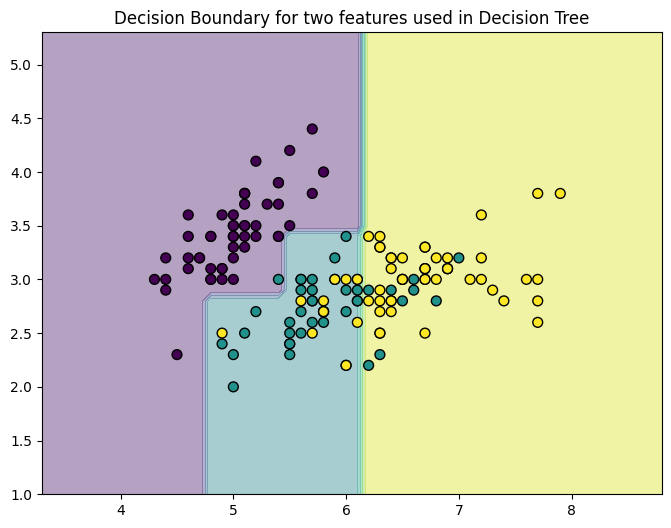

In [21]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal length and pedal length**:

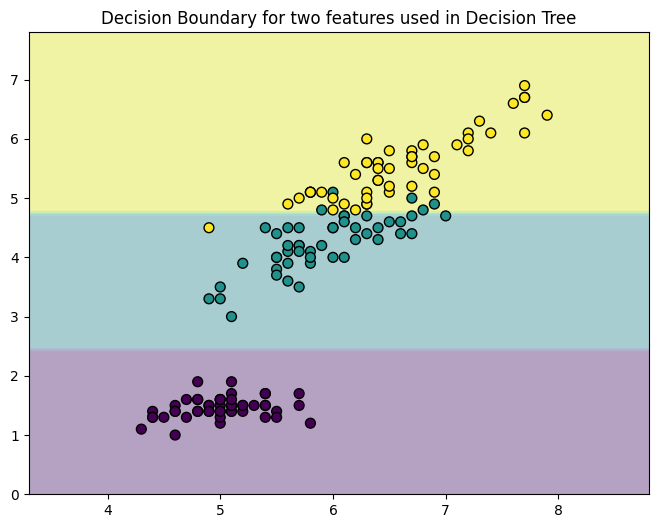

In [22]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 2]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal width and pedal width**:

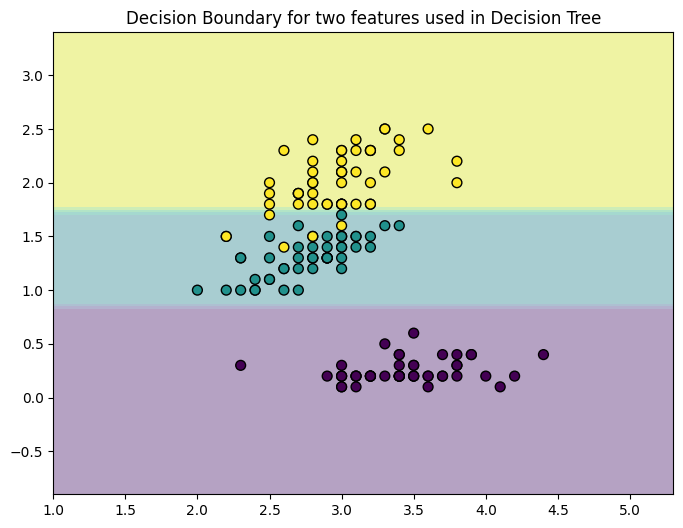

In [23]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [1, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

---

### Exercise 3:

#### 3.1 :
We see that the above decision boundaries are with depth of 3. Compare the above boundary with trees that have higher complexity (by changing the value of `max_depth`) and then pause and ponder.

Test with `max_depth` of the following values:
- 2
- 5
- 10


What do you observe?

#### 3.2 :

On a closer look, we see that the decision boundaries' lines are always at a right angle to the principle axes. Can you reason on why is that the case? \
`(Hint: How is a decision made at any node?)`

---

### Exercise 4:

Complete the following function predict: which takes in four variables : `sepal width, sepal length, petal width, petal length` and returns the class of the flower. Use the decision tree made in Exercise 2 and realise the logic using multiple nested `if else` statements.

In [13]:
def predictSpecies(sepal_width, sepal_length, petal_width,  petal_length) -> str :
  """
    Write your program here to return the species of the plant (string) using if else statements.
  """
  pass

ANSWER 3.1 Decision Tree Visualization with Different max_depth Values:

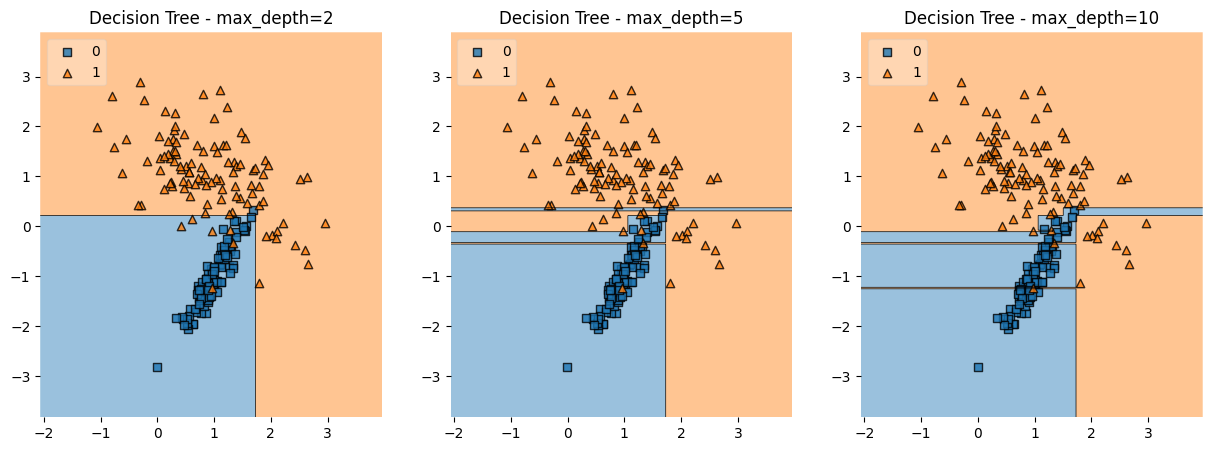

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions  # You may need to install mlxtend

# Create a synthetic dataset
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define different max_depth values
max_depth_values = [2, 5, 10]

# Plot decision boundaries for different max_depth values
plt.figure(figsize=(15, 5))

for i, max_depth in enumerate(max_depth_values, 1):
    # Create and fit the decision tree model
    tree_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree_model.fit(X_train, y_train)

    # Plot decision boundary
    plt.subplot(1, len(max_depth_values), i)
    plot_decision_regions(X_train, y_train, clf=tree_model, legend=2)
    plt.title(f'Decision Tree - max_depth={max_depth}')

plt.show()


ANSWER 3.2 Decision Boundary Lines at Right Angles:

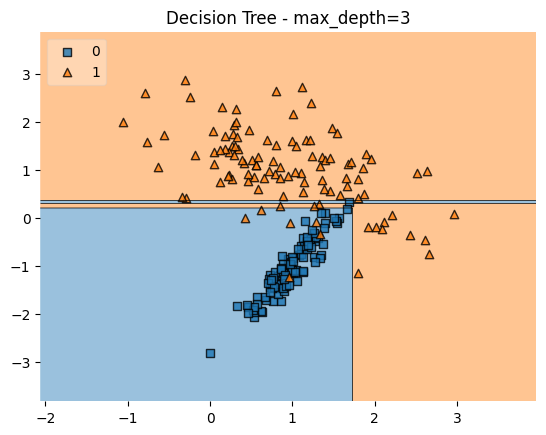

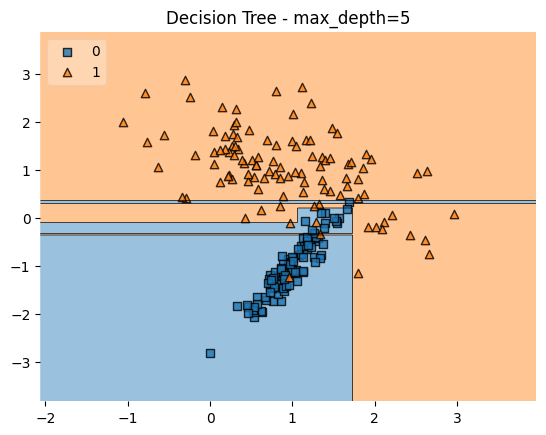

In [26]:
import numpy as np

# Function to plot decision tree boundaries
def plot_tree_boundary(tree_model, X, y):
    plot_decision_regions(X, y, clf=tree_model, legend=2)
    plt.title(f'Decision Tree - max_depth={tree_model.max_depth}')
    plt.show()

# Plot decision boundaries for a tree with max_depth=3
tree_model_depth_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model_depth_3.fit(X_train, y_train)
plot_tree_boundary(tree_model_depth_3, X_train, y_train)

# Plot decision boundaries for a tree with max_depth=5
tree_model_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model_depth_5.fit(X_train, y_train)
plot_tree_boundary(tree_model_depth_5, X_train, y_train)


# Entropy and Information:

## How are decision trees built?

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous).
We use entropy to calculate the homogeneity of a sample.

Entropy itself is defined in the following way:

$$E(s) = \sum_{i=1}^c - p_i * log_2(p_i)$$

Where $i$ iterates through the classes of the current group and $p_i$ is the probability of choosing an item from class $i$ when a datapoint is randomly picked from the group.

At anypoint in the process of making the decision tree. All possible methods of dividing the group are considered (across all features and values of separations) and then the division with the most amount of **Information Gain** is used to divide the current group into two. This is done recursively to finally attain a tree.

Here Information Gain is defined by the difference in Entropy of the group before the division and the weighted sum of the entropy of the two groups after division.

$$IG(X) = E(s) - E(s, X)$$




In [24]:
irisData.sample(n = 10, random_state = 5)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
82,5.8,2.7,3.9,1.2,1,versicolor
134,6.1,2.6,5.6,1.4,2,virginica
114,5.8,2.8,5.1,2.4,2,virginica
42,4.4,3.2,1.3,0.2,0,setosa
109,7.2,3.6,6.1,2.5,2,virginica
57,4.9,2.4,3.3,1.0,1,versicolor
1,4.9,3.0,1.4,0.2,0,setosa
70,5.9,3.2,4.8,1.8,1,versicolor
25,5.0,3.0,1.6,0.2,0,setosa
84,5.4,3.0,4.5,1.5,1,versicolor


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('sepal_length').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('sepal_width').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('petal_width').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sepal_width'].value_counts()
    for x_label, grp in _df_6.groupby('sepal_length')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sepal_length')
_ = plt.ylabel('sepal_width')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['petal_width'].value_counts()
    for x_label, grp in _df_7.groupby('sepal_width')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sepal_width')
_ = plt.ylabel('petal_width')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Class'].value_counts()
    for x_label, grp in _df_8.groupby('petal_width')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('petal_width')
_ = plt.ylabel('Class')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ClassName'].value_counts()
    for x_label, grp in _df_9.groupby('Class')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Class')
_ = plt.ylabel('ClassName')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['sepal_length'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='index', y='sepal_length', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['sepal_width'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='index', y='sepal_width', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['petal_width'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='petal_width', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='index', y='Class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Exercise 5:
Calculate the Entropy of the above collection of 10 datapoints.
## Exercise 6:
Suggest a decision node (if, else) statement which divides the group into two groups. Also compute the Information Gain in that division step. Compare this with other decision clauses that you can make and intuitively comment on which is better for classification and observe if this has any correlation with the numerical value of Information Gain.

---

End of Lab 2

EXERCISE 5:ANSWER

In [27]:
import math

# Class distribution
setosa_count = 3
versicolor_count = 4
virginica_count = 3

total_instances = setosa_count + versicolor_count + virginica_count

# Calculate probabilities
p_setosa = setosa_count / total_instances
p_versicolor = versicolor_count / total_instances
p_virginica = virginica_count / total_instances

# Calculate entropy
entropy = - (p_setosa * math.log2(p_setosa) if p_setosa != 0 else 0) \
          - (p_versicolor * math.log2(p_versicolor) if p_versicolor != 0 else 0) \
          - (p_virginica * math.log2(p_virginica) if p_virginica != 0 else 0)

print("Entropy:", entropy)

Entropy: 1.5709505944546684


EXERCISE 6 : ANSWER

In [30]:

import pandas as pd
import math

# Placeholder for the calculate_entropy function
def calculate_entropy(target):
    class_counts = target.value_counts()
    total_instances = len(target)

    entropy = 0
    for count in class_counts:
        probability = count / total_instances
        entropy -= probability * math.log2(probability)

    return entropy

# Assuming you have a DataFrame df with columns 'petal_length' and 'target'
# ... (your data loading code)

# Example data loading (replace this with your actual data loading code)
data = {'petal_length': [1.5, 2.0, 3.0, 2.5, 2.8, 3.2],
        'target': ['A', 'B', 'A', 'B', 'A', 'B']}
df = pd.DataFrame(data)

threshold_value = 2.5  # You need to choose an appropriate threshold based on your data

# Divide the group based on the decision node
subset_1 = df[df['petal_length'] <= threshold_value]
subset_2 = df[df['petal_length'] > threshold_value]

# Calculate entropy for the parent node
entropy_parent = calculate_entropy(df['target'])

# Calculate entropy for each child node
entropy_child_1 = calculate_entropy(subset_1['target'])
entropy_child_2 = calculate_entropy(subset_2['target'])

# Calculate Information Gain
information_gain = entropy_parent - (
    len(subset_1) / len(df) * entropy_child_1 + len(subset_2) / len(df) * entropy_child_2
)

print("Information Gain with petal length <= {}: {}".format(threshold_value, information_gain))



Information Gain with petal length <= 2.5: 0.08170416594551044
